Shreyansh Misra

# I. Creating the Dataset

###### Importing Dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

###### Dataset of Wordle Possible Words

This is wordle's dataset of accepted words. 

In [2]:
words = []
with open('list.txt') as f:
    for line in f:
        words.append(line.strip())

total = len(words)
print(total, words[0:12])

12972 ['aahed', 'aalii', 'aargh', 'aarti', 'abaca', 'abaci', 'aback', 'abacs', 'abaft', 'abaka', 'abamp', 'aband']


###### Creating a single string

Why this helps?

In [3]:
OneString = ''.join([str(word) for word in words])
len(OneString), OneString[0:60]

(64860, 'aahedaaliiaarghaartiabacaabaciabackabacsabaftabakaabampaband')

# II. Strategies

AES are most popular. I expected the other vowels to be higher up. 

###### Vowel Frequency Strategy

In [6]:
vowels = ['a', 'e', 'i', 'o', 'u']
freqVowels = [OneString.count(vowels[i]) for i in range(len(vowels))]

dictVowel = {'Vowel': vowels, 'Frequency': freqVowels}  
dfVowel = pd.DataFrame(dictVowel) 
dfVowel = dfVowel.sort_values(by=['Frequency'], ascending=False)
dfVowel

,Vowel,Frequency
1,e,6662
0,a,5990
3,o,4438
2,i,3759
4,u,2511


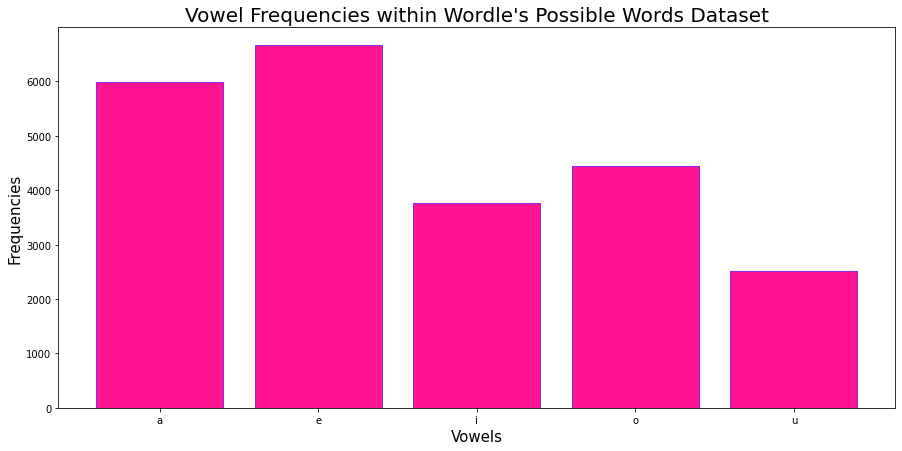

In [34]:
xv = vowels
yv = freqVowels
plt.figure(figsize=[15, 7])

plt.bar(xv, yv, edgecolor='blueviolet', color='deeppink')
plt.title("Vowel Frequencies within Wordle's Possible Words Dataset", fontsize=20)
plt.xlabel('Vowels', fontsize=15)
plt.ylabel('Frequencies', fontsize=15)
plt.show()

Very interesting... I expected there to be more of each other vowel

###### Letter Frequency Strategy

In [4]:
alpha = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
freq = [OneString.count(alpha[i]) for i in range(len(alpha))]

dictLetter = {'Letter': alpha, 'Frequency': freq}  
dfLetter = pd.DataFrame(dictLetter)
dfLetter = dfLetter.sort_values(by=['Frequency'], ascending=False)
dfLetter

,Letter,Frequency
18,s,6665
4,e,6662
0,a,5990
14,o,4438
17,r,4158
8,i,3759
11,l,3371
19,t,3295
13,n,2952
20,u,2511


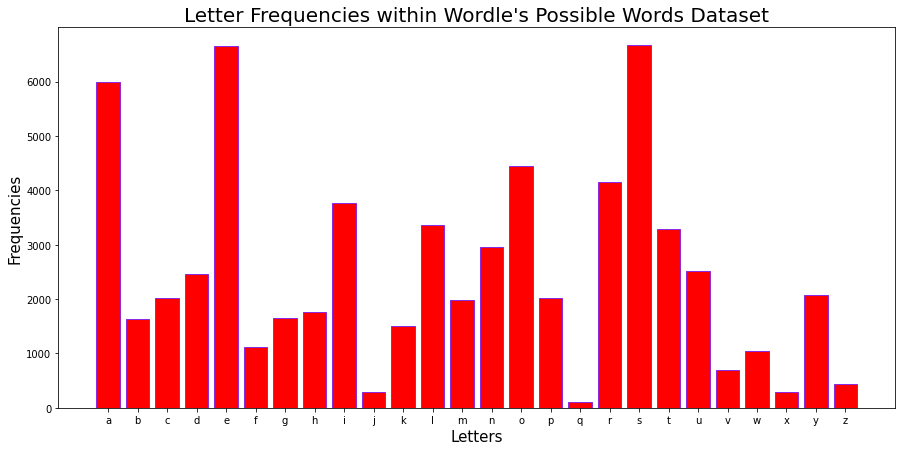

In [25]:
x = alpha
y = freq

plt.figure(figsize=[15, 7])

plt.bar(x, y, edgecolor='blueviolet', color='r')
plt.title("Letter Frequencies within Wordle's Possible Words Dataset", fontsize=20)
plt.xlabel('Letters', fontsize=15)
plt.ylabel('Frequencies', fontsize=15)
plt.show()

##### Backtesting Strategies

In [7]:
def backtest(starter, words):
    
    total = len(words)
    guess = starter
    removed = 0

    for word in words:
        for i in range(5):
            if guess[i] in word:
                removed += 1
                break
    
    pct = round(100 - ((total - removed)/total*100), 2)
    return guess, ("{}%".format(pct))

In [8]:
backtest(starter="adieu", words=words)

('adieu', '92.18%')

In [9]:
backtest(starter="soare", words=words)

('soare', '95.55%')

In [10]:
backtest(starter="slate", words=words)

('slate', '93.33%')

###### Brute Force Strategy

In [11]:
data = []

for i in words:
    hold = backtest(starter=i, words=words)
    data.append(hold)

bruteForce = pd.DataFrame(data, columns=['Word','Score'])
bruteForce = bruteForce.sort_values(by=['Score'], ascending=False)
bruteForce

,Word,Score
11448,toeas,95.72%
10741,stoae,95.72%
317,aloes,95.68%
138,aeons,95.64%
549,arose,95.55%
...,...,...
4147,fuzzy,39.29%
5276,hyphy,38.06%
12683,xylyl,37.66%
4097,fuffy,37.11%


In [12]:
best = bruteForce.Word.tolist()
print(best[0:10])

['toeas', 'stoae', 'aloes', 'aeons', 'arose', 'aeros', 'soare', 'reais', 'arise', 'raise']


Funny that toeas is number one, however, it does have vowels, t, s
aeons, arose, arise, raise -- only ones that we actually use ++ AES visible in all
